###1.0 Import Modules

In [57]:
#Importing libraries
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

We´re going to import the **univariate rice price change** dataset in order to apply different statistical stock prediction methods

In [58]:
df_rice = pd.read_csv("drive/MyDrive/COGS_Project/EDA/Data/Univariate_Rice_Price_Change.csv")

###2.0 Preprocessing Data

We need to pre-process the data as the **moving averages** algorithm has a series of assumptions:
  - The data is stationary
  - Normal Distribution
  - Standart Scaling
  - No outliers

In [59]:
df_rice = df_rice.drop("Unnamed: 0",axis=1)

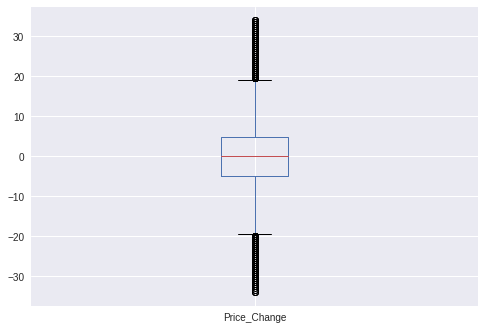

In [60]:
df_rice.boxplot()

In [61]:
df_rice

,Date,Price_Change
0,2009-06-25,-12.0
1,2009-06-27,0.0
2,2009-06-28,-20.5
3,2009-06-29,28.5
4,2009-06-30,14.5
...,...,...
3674,2021-11-30,0.0
3675,2021-12-01,0.0
3676,2021-12-02,0.0
3677,2021-12-03,0.0


Visualizing the daily change of the price of rice

Text(0, 0.5, 'Price Change')

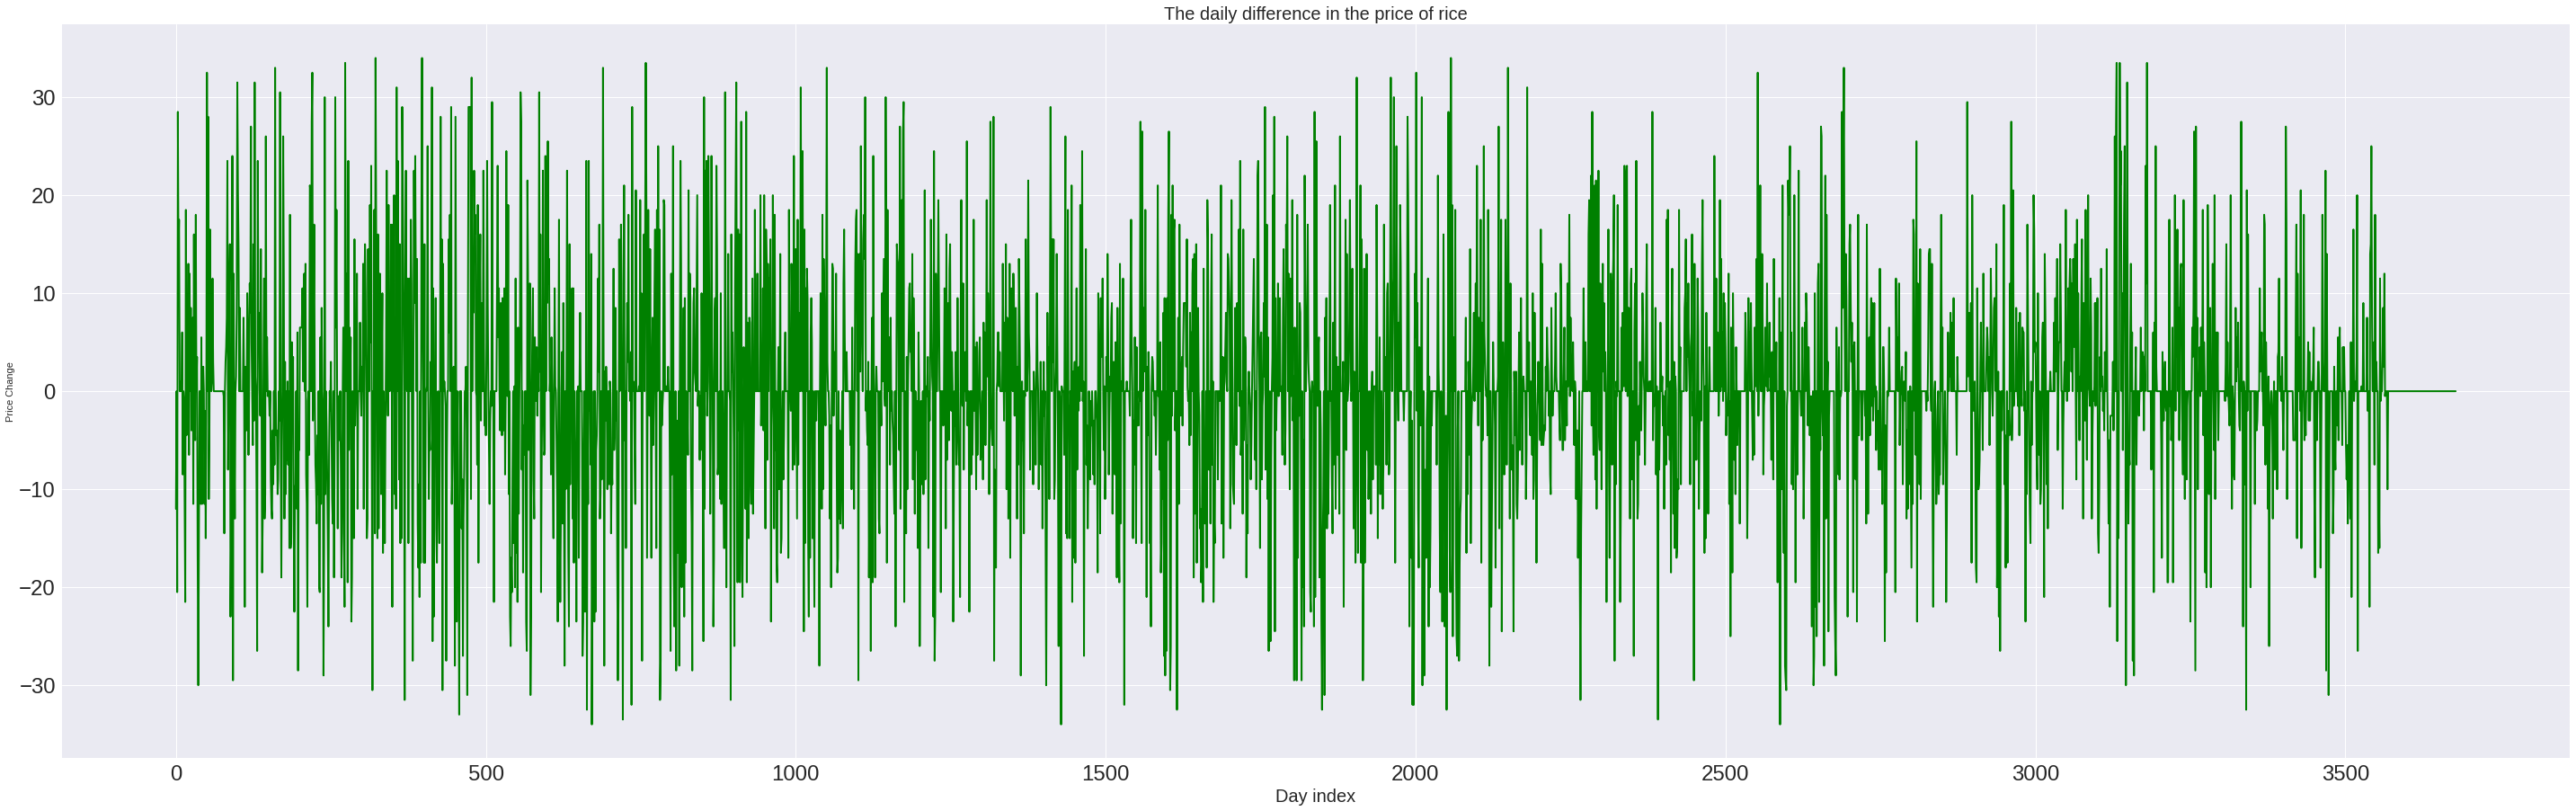

In [62]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

# ploting graph
df_rice.plot(color='green', linewidth=2, figsize=(50,15))


plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend('')


plt.title('The daily difference in the price of rice', fontsize=20)
plt.xlabel('Day index', fontsize=20)
plt.ylabel("Price Change")

###3.0 Simple Moving Average

We´re going to use a **moving average** to analyze the data points, this is done by averaging the different subsets of the full dataset. The subset  is moved by windows and we take the mean to predict the future daily price. A 
**Simple moving averages** is a **moving average** but the  mean of the previous data pointa is done without using **weights**.

In [63]:
# set year column as index
df_rice.set_index('Date', inplace=True)

# translate index name into English
df_rice.index.name = 'year'

# calculate the daily_rice_price_change
df_rice['daily_rice_price_change'] = df_rice.mean(axis=1)

# drop columns containing monthly values
df_rice = df_rice[['daily_rice_price_change']]


We´re going to use two different periods to analyze the price of rice. We´re going to use a **10 day interval** and a **20 day interval**.

In [64]:
# the simple moving average over a period of 30 day
df_rice['SMA_30'] = df_rice.daily_rice_price_change.rolling(30, min_periods=1).mean()

# the simple moving average over a period of 60 day
df_rice['SMA_60'] = df_rice.daily_rice_price_change.rolling(60, min_periods=1).mean()



Plotting the moving average prediction

In [65]:
df_rice.iloc[3344:,]

,daily_rice_price_change,SMA_30,SMA_60
year,,,
2021-01-01,0.0,0.216667,0.841667
2021-01-02,0.0,-0.450000,0.808333
2021-01-03,0.0,-0.450000,0.591667
2021-01-04,-20.0,-0.716667,0.258333
2021-01-05,0.0,-0.733333,0.358333
...,...,...,...
2021-11-30,0.0,0.000000,0.000000
2021-12-01,0.0,0.000000,0.000000
2021-12-02,0.0,0.000000,0.000000


[]

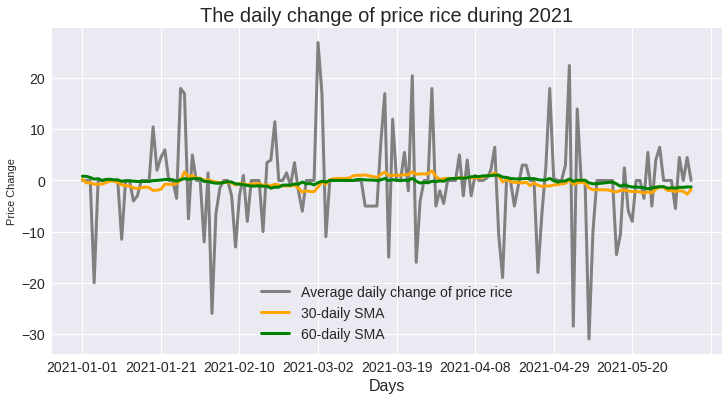

In [66]:
  # colors for the line plot
colors = ['gray', 'orange',"green"]

# line plot - the daily difference in the price of rice
df_rice.iloc[3344:3500,][['daily_rice_price_change', 'SMA_30',"SMA_60"]].plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average daily change of price rice', '30-daily SMA', '60-daily SMA'], fontsize=14)

# title and labels
plt.title('The daily change of price rice during 2021', fontsize=20)
plt.xlabel('Days', fontsize=16)
plt.ylabel("Price Change")
plt.plot()

###4.0 Cumulative Moving Average

The **cumulative moving average**, is a **moving average** is the **unweighted mean** of the previous values up to the current time **t**

In [69]:

df_rice['CMA'] = df_rice.daily_rice_price_change.expanding().mean()


[]

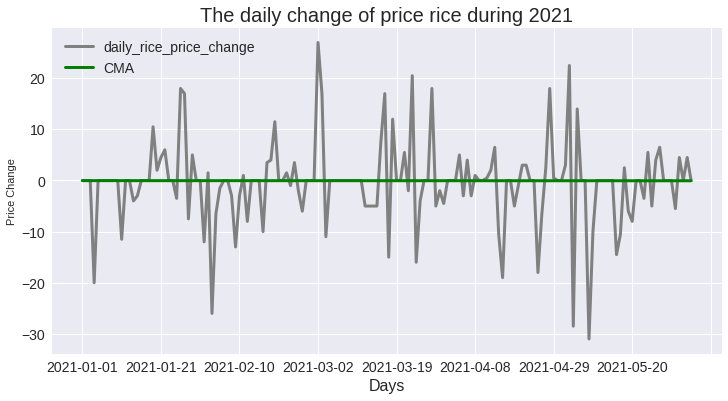

In [70]:

colors = ['gray', 'green']


df_rice.iloc[3344:3500,][['daily_rice_price_change', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['daily_rice_price_change', 'CMA'], fontsize=14)


plt.title('The daily change of price rice', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.title('The daily change of price rice during 2021', fontsize=20)
plt.xlabel('Days', fontsize=16)
plt.ylabel("Price Change")
plt.plot()

### 5.0 Exponential Moving Average

The **exponential moving average** is a type of moving average that places more **weight** and significance on the most recent data points

In [44]:

df_rice['EMA_0.1'] = df_rice.daily_rice_price_change.ewm(alpha=0.1, adjust=False).mean()


df_rice['EMA_0.3'] = df_rice.daily_rice_price_change.ewm(alpha=0.3, adjust=False).mean()


[]

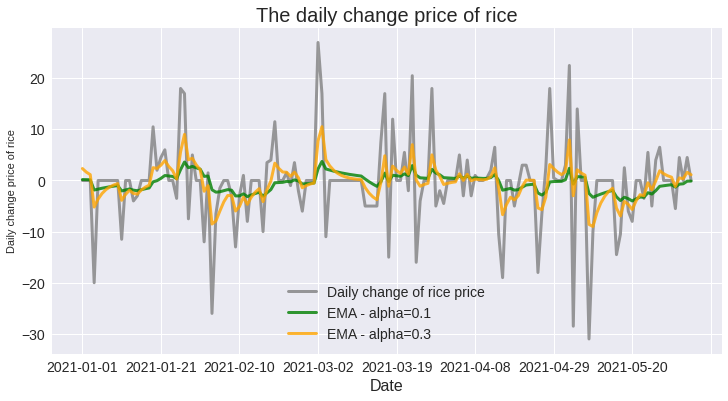

In [46]:

colors = ['gray', 'green', 'orange']

df_rice.iloc[3344:3500,][['daily_rice_price_change', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Daily change of rice price', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

plt.title('The daily change price of rice', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Daily change price of rice')
plt.plot()

[]

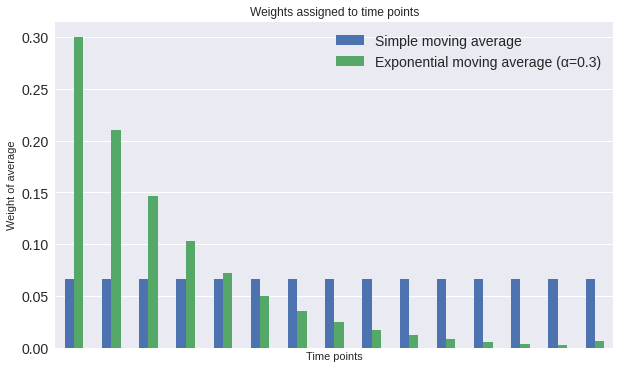

In [47]:
import numpy as np

# smoothing factor and number of data points
ALPHA = 0.3
N = 15

# weights - simple moving average
w_sma = np.repeat(1/N, N)

# weights - exponential moving average alpha=0.3 adjust=False
w_ema = [(1-ALPHA)**i if i==N-1 else ALPHA*(1-ALPHA)**i for i in range(N)]

# store the values in a data frame 
pd.DataFrame({'w_sma': w_sma, 'w_ema': w_ema}).plot(kind='bar', figsize=(10,6))

# modify ticks size and labels
plt.xticks([])
plt.yticks(fontsize=14)
plt.legend(labels=['Simple moving average', 'Exponential moving average (α=0.3)'], fontsize=14)
plt.ylabel("Weight of average")
plt.xlabel("Time points")
plt.title("Weights assigned to time points")
plt.plot()

### 6.0 Results

We have tried three different implementations for univariate analysis of the market we have used three different types of moving averages which are:

*   Simple Moving Average
*   Cumulative Moving Average
*.  Exponential Moving Average

From the plots we can see that the predictions tend to average out and stay in 0, we see this in the three different types of **moving averages**. Although this occurs the EMA model adapts a lot better to the data, the simple MA adapts slightly to the data and the CMA only predicts 0 constantly.



In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
df_rice.iloc[3344:,]["EMA_0.3"]

year
2021-01-01    2.342638e+00
2021-01-02    1.639846e+00
2021-01-03    1.147893e+00
2021-01-04   -5.196475e+00
2021-01-05   -3.637533e+00
                  ...     
2021-11-30   -8.078537e-17
2021-12-01   -5.654976e-17
2021-12-02   -3.958483e-17
2021-12-03   -2.770938e-17
2021-12-04   -1.939657e-17
Name: EMA_0.3, Length: 335, dtype: float64

In [ ]:
EMA_03 = mean_squared_error(df_rice.iloc[3344:,]["average_temperature"], df_rice.iloc[3344:,]["EMA_0.3"])

In [ ]:
EMA_01 = mean_squared_error(df_rice.iloc[3344:,]["average_temperature"], df_rice.iloc[3344:,]["EMA_0.1"])

In [ ]:
CMA = mean_squared_error(df_rice.iloc[3344:,]["average_temperature"], df_rice.iloc[3344:,]["CMA"])

In [ ]:
SMA_10 = mean_squared_error(df_rice.iloc[3344:,]["average_temperature"], df_rice.iloc[3344:,]["SMA_10"])

In [ ]:
SMA_20 = mean_squared_error(df_rice.iloc[3344:,]["average_temperature"], df_rice.iloc[3344:,]["SMA_20"])

In [ ]:
print("Error EMA, alpha= 0.3 : ", EMA_03)
print("Error EMA, alpha= 0.1 : ", EMA_03)
print("Error CMA, alpha= 0.3 : ", CMA)
print("Error SMA_10, alpha= 0.3 : ", CMA)
print("Error SMA_20, alpha= 0.3 : ", CMA)

Error EMA, alpha= 0.3 :  27.72264537730949
Error EMA, alpha= 0.1 :  27.72264537730949
Error CMA, alpha= 0.3 :  48.07676928650727
Error SMA_10, alpha= 0.3 :  48.07676928650727
Error SMA_20, alpha= 0.3 :  48.07676928650727


From what we see both visually and using the mean squared error that the  model that performs the better for univariate analysis is the EMA, both alpha=0.1, and alpha=0.3 perform with the same mean squared error of 27.722

There are many algorhitms and methods not covered in this interpretation we could use⁉


*   Other univariate methods apart from **moving average**
*   Changing the time interval, using weekly data, monthly data or other type of interval



In [ ]:
From 

Code inspired from https://towardsdatascience.com/moving-averages-in-python-16170e20f6c